<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/day1_project(%ED%95%99%EC%8A%B5%EC%9E%90%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 미니 프로젝트: 택시요금 데이터 다루기
___

## 데이터 불러오기, 데이터 확인
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#data = pd.read_csv('trip.csv')
file_path = '/content/drive/MyDrive/DS/3.비정제 데이터 체험1/trip.csv'
data = pd.read_csv(file_path)

z

In [4]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 중복 데이터 확인
___

In [7]:
# Q. 중복 데이터를 확인합니다.

data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [8]:
# Q. 중복 데이터를 확인합니다.
# 위에서 확인한 중복 데이터의 승객명을 [[PASSENGER_NAME]] 대신 넣어주세요.

data[(data['passenger_name'] == 'Sarah Gross') | (data['passenger_name'] == 'Lisa Bullock')]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [9]:
# Q. 중복 데이터를 제거합니다.

data.drop_duplicates(inplace=True)

In [10]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


## 결측치 확인
---

In [11]:
data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [12]:
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.

data.isnull().mean()*100

,0
passenger_name,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
payment_method,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.013216
tip_amount,0.000000
tolls_amount,0.000000


In [13]:
# Q. 결측치를 제거합니다.

data.dropna(inplace=True)

In [14]:
data.isna().mean()

,0
passenger_name,0.0
tpep_pickup_datetime,0.0
tpep_dropoff_datetime,0.0
payment_method,0.0
passenger_count,0.0
trip_distance,0.0
fare_amount,0.0
tip_amount,0.0
tolls_amount,0.0


## passenger_count 컬럼의 이상치 제거
___

In [15]:
# passenger_count 컬럼의 값을 기준으로 정렬합니다.

data['passenger_count'].sort_values()

,passenger_count
21754,0
21640,0
21218,0
20312,0
19458,0
...,...
21119,6
3867,6
3903,6
3878,6


<Axes: xlabel='None', ylabel='passenger_count'>

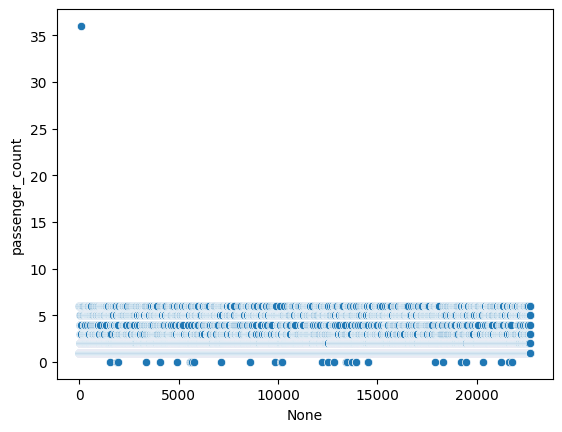

In [16]:
# passenger_count 값의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [17]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

data = data[data['passenger_count'] <= 6]

In [18]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

len(data[data['passenger_count'] == 0])

33

In [19]:
# passenger_count 컬럼의 이상치를 제거합니다.

data = data[data['passenger_count'] != 0]

<Axes: xlabel='None', ylabel='passenger_count'>

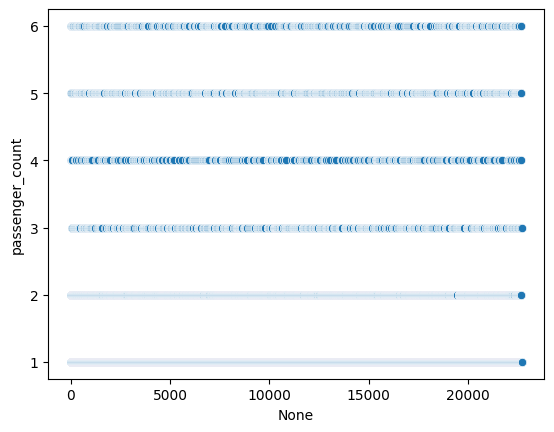

In [20]:
# passenger_count의 scatter plot을 다시 그려봅니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

## 수치형 컬럼의 이상치 제거
___

### trip_distance

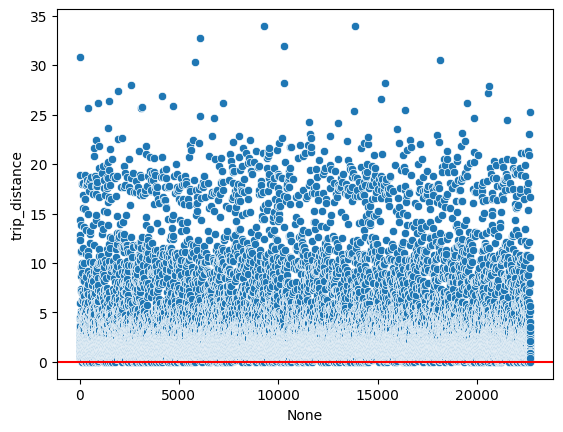

In [21]:
# Q. trip_distance의 이상치를 확인합니다.

sns.scatterplot(x = data.index, y = data['trip_distance'])
plt.axhline(y=0, color='red')

In [22]:
data['trip_distance'].sort_values()

,trip_distance
22672,0.00
9801,0.00
6910,0.00
22327,0.00
14374,0.00
...,...
30,30.83
10293,31.95
6066,32.72
13863,33.92


In [23]:
# Q. trip_distance의 이상치를 제거합니다.

data = data[data['trip_distance']!= 0]

<Axes: xlabel='trip_distance', ylabel='Count'>

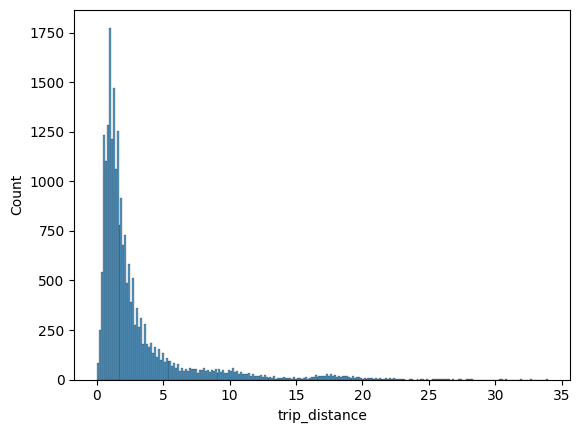

In [24]:
# Q. trip_distance의 히스토그램을 그립니다.

sns.histplot(x = data['trip_distance'])

In [25]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22515.000000,22515.000000,22515.000000,22515.000000,22515.000000
mean,1.645969,2.931924,12.958055,1.829513,0.309625
std,1.285783,3.657290,12.701799,2.767054,1.387300
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


### fare_amount

13 1


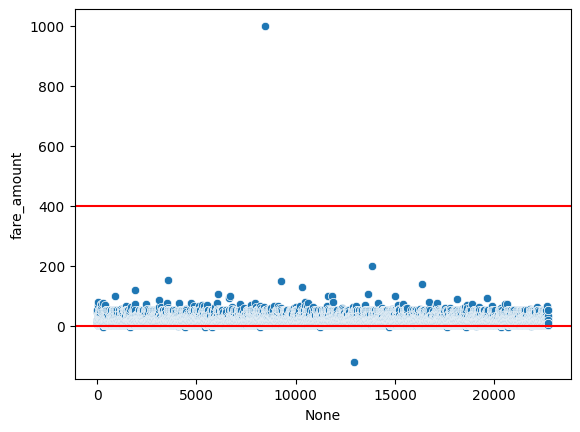

In [26]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)
sns.scatterplot(x=data.index, y=data['fare_amount'])
plt.axhline(y=400, color='red')
plt.axhline(y=0, color='red')
print(len(data[data['fare_amount'] <0]), len(data[data['fare_amount'] > 400]))

In [27]:
# Q. fare_amount의 이상치를 제거합니다.

data = data[ (data['fare_amount'] > 0) & (data['fare_amount'] < 400) ]

In [28]:
data['fare_amount'].sort_values()

,fare_amount
4063,0.01
22682,2.50
11359,2.50
12336,2.50
17749,2.50
...,...
10293,131.00
16381,140.00
9282,150.00
3584,152.00


<Axes: xlabel='None', ylabel='fare_amount'>

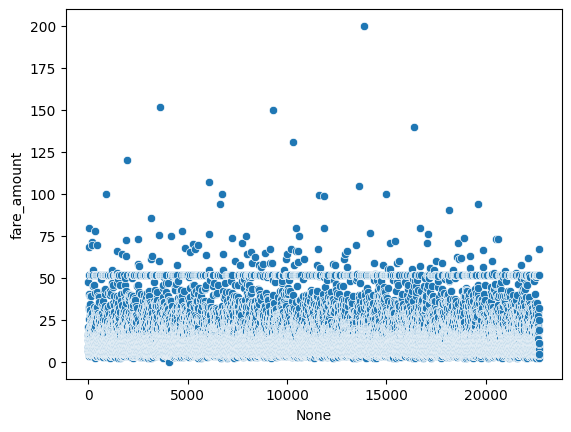

In [29]:
# Q. fare_amount의 scatter plot을 그립니다.

sns.scatterplot(x=data.index, y=data['fare_amount'])

In [30]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [31]:
data['fare_amount'].apply(fare_func)

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5
...,...
22696,4.0
22697,52.0
22698,4.5
22699,10.5


In [32]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [33]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
22682,Lisa Miller,05/16/2017 6:35:44 AM,05/16/2017 6:35:51 AM,Cash,1,1.30,2.50,0.00,0.00
11359,Kelsey Hill,12/25/2017 10:28:28 AM,12/25/2017 10:28:38 AM,Cash,2,0.06,2.50,0.00,0.00
12336,Melissa Marshall,10/17/2017 6:01:43 PM,10/17/2017 6:02:14 PM,Cash,2,0.04,2.50,0.00,0.00
17749,Tina Castro,06/13/2017 2:45:20 PM,06/13/2017 2:46:07 PM,Cash,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,150.00,51.64,5.76
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00


### fare_amount

<Axes: xlabel='None', ylabel='tip_amount'>

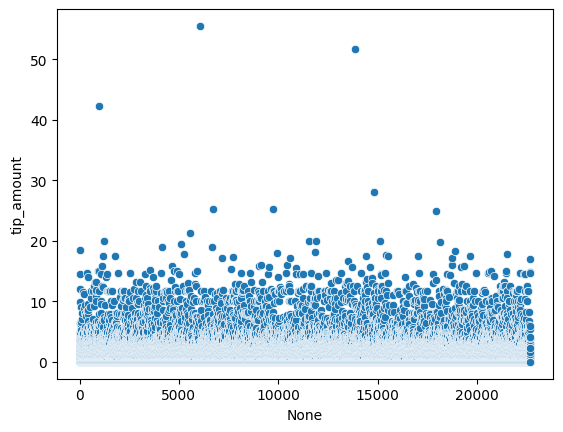

In [34]:
# Q. tip_amount의 scatter plot을 그립니다.

sns.scatterplot(x=data.index, y=data['tip_amount'])

3


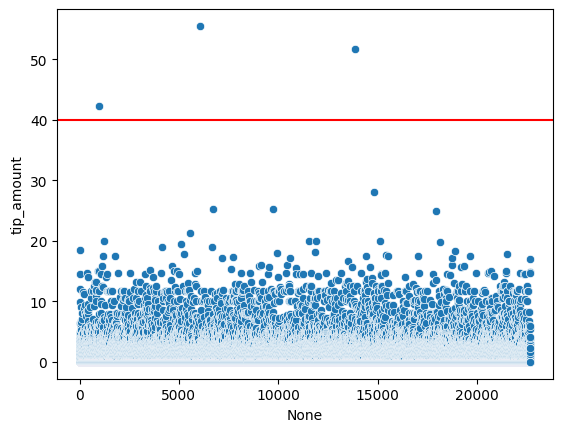

In [35]:
# Q. tip_amount의 이상치를 확인합니다.

sns.scatterplot(x=data.index, y=data['tip_amount'])
plt.axhline(y=40, color='red')

print(len(data[data['tip_amount'] > 40]))

In [36]:
# Q. tip_amount의 이상치를 제거합니다.

data = data[data['tip_amount'] <= 40]

In [37]:
len(data)

22495

<Axes: xlabel='None', ylabel='tolls_amount'>

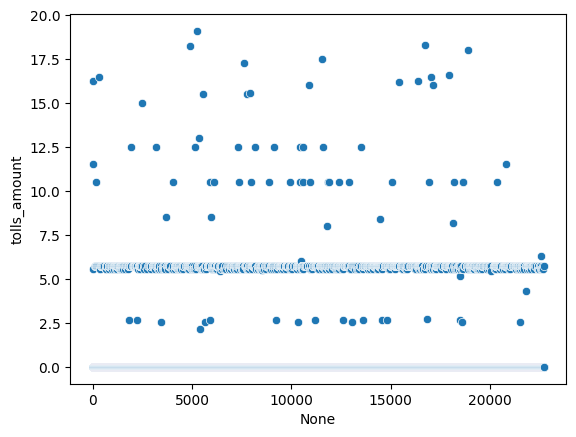

In [38]:
# Q. tolls_amount의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['tolls_amount'])

## 범주형 데이터 전처리
---

### payment_method
결제 방법: Debit Card와 Credit Card를 Card로 통합합니다.


In [39]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [40]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [41]:
data['payment_method'].nunique()

3

In [42]:
data['payment_method'].value_counts()

,count
payment_method,
Cash,11094
Debit Card,5729
Credit Card,5672


In [43]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다.
# (힌트: replace() 메서드를 사용합니다.)

data['payment_method'].replace({'Debit Card':'Card', 'Credit Card': 'Card'}, inplace=True)

/tmp/ipython-input-43-4154293525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['payment_method'].replace({'Debit Card':'Card', 'Credit Card': 'Card'}, inplace=True)


In [44]:
data['payment_method'].value_counts()

,count
payment_method,
Card,11401
Cash,11094


### passenger_name
승객명: 성과 이름을 분리하여 성 부분만 저장해봅니다.

In [45]:
example = 'Susan Robinson'

In [46]:
example.split()

['Susan', 'Robinson']

In [47]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.

data['passenger_first_name'] = data['passenger_name'].str.split().apply(lambda x: x[0])

### tpep_pickup_datetime, tpep_dropoff_datetime
택시 탑승, 하차 시간을 활용해봅시다.

In [48]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22495 non-null  object 
 1   tpep_pickup_datetime   22495 non-null  object 
 2   tpep_dropoff_datetime  22495 non-null  object 
 3   payment_method         22495 non-null  object 
 4   passenger_count        22495 non-null  int64  
 5   trip_distance          22495 non-null  float64
 6   fare_amount            22495 non-null  float64
 7   tip_amount             22495 non-null  float64
 8   tolls_amount           22495 non-null  float64
 9   passenger_first_name   22495 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


In [50]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [51]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22495 non-null  object        
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns]
 3   payment_method         22495 non-null  object        
 4   passenger_count        22495 non-null  int64         
 5   trip_distance          22495 non-null  float64       
 6   fare_amount            22495 non-null  float64       
 7   tip_amount             22495 non-null  float64       
 8   tolls_amount           22495 non-null  float64       
 9   passenger_first_name   22495 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 2.4+ MB


In [53]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.

data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [54]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22495 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22495 non-null  object         
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns] 
 3   payment_method         22495 non-null  object         
 4   passenger_count        22495 non-null  int64          
 5   trip_distance          22495 non-null  float64        
 6   fare_amount            22495 non-null  float64        
 7   tip_amount             22495 non-null  float64        
 8   tolls_amount           22495 non-null  float64        
 9   passenger_first_name   22495 non-null  object         
 10  travel_time            22495 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.6+ MB


In [56]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.

#data['travel_time'] = data['travel_time'].dt.total_seconds()
data['travel_time'] = data['travel_time'].dt.seconds

### 보너스 (feature engineering 맛보기)


In [57]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003


In [58]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

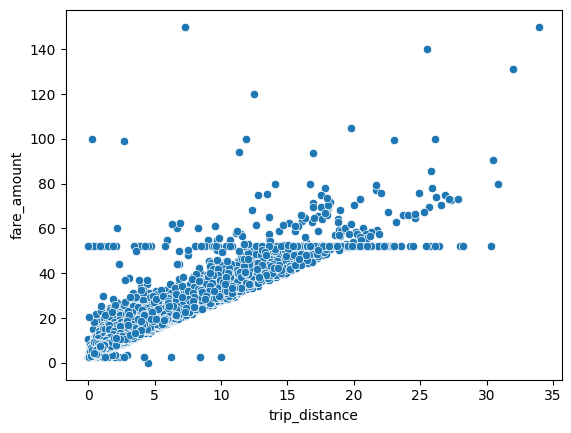

In [59]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x = 'trip_distance', y = 'fare_amount', data = data)

<Axes: xlabel='travel_time', ylabel='fare_amount'>

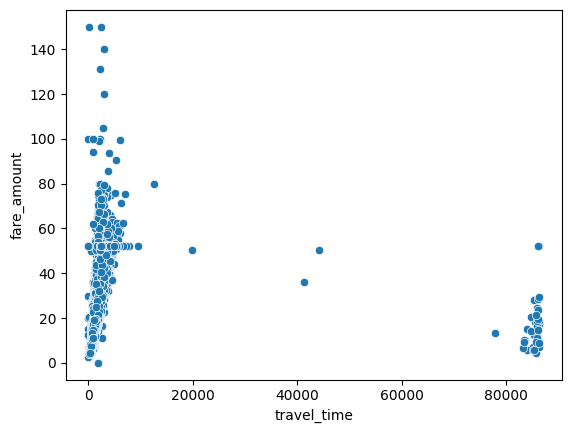

In [60]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x = 'travel_time', y = 'fare_amount', data = data)

<Axes: xlabel='travel_time', ylabel='trip_distance'>

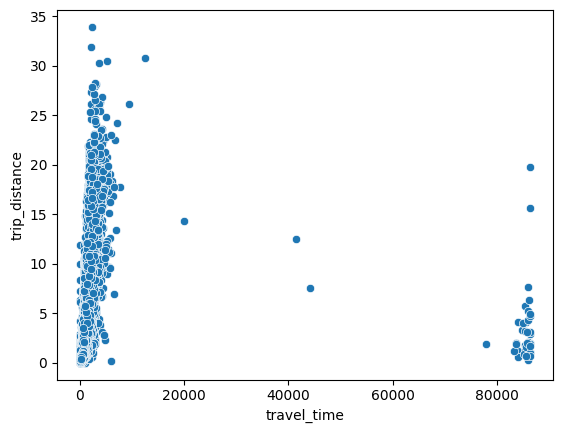

In [61]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x = 'travel_time', y = 'trip_distance', data = data)

In [62]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.

data = data[data['travel_time'] < 60000]